**Question**

Use appropriate machine learning model to demonstrate how machine learning can be used on e-commerce sites for product recommendations to users.

**Background**

To offer recommendations to their customers, e-commerce companies such as Amazon and Flipkart employ various recommendation systems.The item-item collaborative filtering that Amazon now utilizes scalable to large datasets and generates a high-quality recommendation system in real time. This system aims to forecast the "rating" or preferences that the user is interested in, making it a sort of information filtering mechanism.


**Introduction to Recommendation systems**


A recommendation engine is a program or algorithm that evaluates user information and makes tailored recommendations for products or content that the user would find interesting. The user's preferences, past behavior, demographic data, and user commonalities are some of the variables that go into these recommendations.

OTT platforms, social media, e-commerce, and other online businesses frequently employ recommendation engines to improve user experience and engagement. They assist consumers in finding new products, films, music, articles, or anything else that piques their interest.

By establishing a relationship between the user and the object, the recommender system uses this similarity to provide suggestions.

**What recommeder system can solve ?**

1. It can aid the user in selecting the appropriate item.
2. User engagement may rise as a result. Google News, for instance, has 40% more clicks as a result of recommendations.
3. It aids in the delivery of goods to the appropriate user by item providers.35% of products on Amazon are sold as a result of recommendations.
4. It contributes to the more individualized content.Netflix recommends most of the movies that are rented.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It functions by suggesting highly rated products that are viewed and bought by the majority of users.It isn't a customized suggestion.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommendations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaborative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( will be ignored in this exercise)

In [53]:
import pandas as pd #for data manipulation and analysis.
import numpy as np #for numerical operations and array handling
import seaborn as sns #for statistical data visualization
from matplotlib import pyplot as plt #for creating static, animated, and interactive visualizations.
import warnings #to manage warnings during code execution.
import os #for interacting with the operating system.
import importlib #for importing modules dynamically.
import opendatasets as od #allows you to easily download datasets from various online sources directly into your local environment
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [54]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

In [55]:
import os

data_dir = '../data/amazon-product-reviews'
if not os.path.exists(data_dir):
    od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews', data_dir=data_dir)
else:
    print("File already exists.")

File already exists.


In [56]:
#load the dataframe and set column name
df=pd.read_csv('../data/amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [57]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [58]:
df.shape

(7824482, 4)

In [59]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

For analysis, I am choosing a random 20% sample of the complete dataset, or 1564896, because it is quite vast and will be difficult to investigate in its entirety due to resource limitations.

In [60]:
electronics_data=df.sample(n=1564896,ignore_index=True) #Reset the index of the resulting DataFrame after sampling

In [61]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [62]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A20SHQUMLN5KWQ,B000EPLP3C,5.0,1183507200
1,A3G6IYBV9SBQ1W,B007KZQM9Q,5.0,1374451200
2,AVZ73YZHUEXXM,B003ELYQGG,5.0,1365465600
3,A3LRBQW1O4L72A,B002V15ZGK,5.0,1367539200
4,A2WA8TDCTGUADI,B000NIKL6W,2.0,1245715200


In [63]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [64]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [65]:
#generate descriptive statistics.
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.011103e+00
std,1.382110e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [66]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [67]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [68]:
electronics_data.head()

,userId,productId,rating
0,A20SHQUMLN5KWQ,B000EPLP3C,5.0
1,A3G6IYBV9SBQ1W,B007KZQM9Q,5.0
2,AVZ73YZHUEXXM,B003ELYQGG,5.0
3,A3LRBQW1O4L72A,B002V15ZGK,5.0
4,A2WA8TDCTGUADI,B000NIKL6W,2.0


In [69]:
#generate descriptive statistics for ratings.
electronics_data['rating'].describe()

count    1.564896e+06
mean     4.011103e+00
std      1.382110e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [70]:
#get the unique ratings
electronics_data['rating'].unique()

array([5., 2., 4., 3., 1.])

In [71]:
#get the unique count of each rating
electronics_data['rating'].value_counts()

rating
5.0    869601
4.0    296108
1.0    180797
3.0    126945
2.0     91445
Name: count, dtype: int64

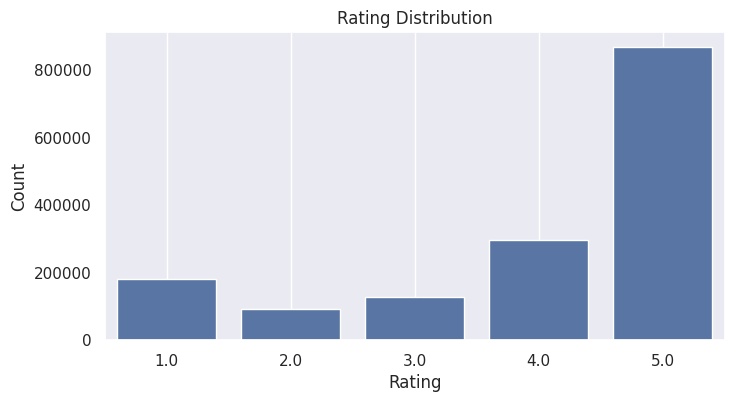

In [72]:
#plots a bar chart showing the count of each unique value in the rating
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [73]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225839
Total unique products :  237597


count how many ratings each user has made

In [74]:
#count of products rated by each user, sorted in descending order.
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False) #counts how many non-null entries exist in the rating column for each userId group
no_of_rated_products_per_user.head(10)

userId
A3OXHLG6DIBRW8    104
ADLVFFE4VBT8       92
A680RUE1FDO8B      90
A5JLAU2ARJ0BO      85
A1ODOGXEYECQQ8     80
A6FIAB28IS79       78
ARBKYIVNYWK3C      75
AWPODHOB4GFWL      66
A36K2N527TXXJN     64
A2AY4YUOX2N1BQ     63
Name: rating, dtype: int64

In [75]:
print(f'No of rated product more than 50 per user : {sum(no_of_rated_products_per_user >= 50)}')

No of rated product more than 50 per user : 24


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [76]:
#filter out products that have atleast 50 ratings.
#products with very few ratings might not provide enough data for effective recommendation modeling and are often excluded to improve model quality.
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [77]:
#remove users who have rated very few products (e.g., less than 5 ratings) or products with very few ratings.
# data = data.groupby('userId').filter(lambda x: len(x) > 5)  
# data = data.groupby('productId').filter(lambda x: len(x) > 5)  

In [78]:
data.head()

,userId,productId,rating
0,A20SHQUMLN5KWQ,B000EPLP3C,5.0
2,AVZ73YZHUEXXM,B003ELYQGG,5.0
6,A3CZZHHQ1P7YSK,B00141AYIC,5.0
8,A2SCEWWILKJM0H,B001D60LG8,5.0
11,A3C3TSVMSQ4W0U,B003O1UYHG,5.0


In [79]:
#get no of ratings per filtered products
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [80]:
no_of_rating_per_product.head(10).sort_values(ascending=False)

productId
B0074BW614    3688
B00DR0PDNE    3334
B007WTAJTO    2820
B006GWO5WK    2472
B0019EHU8G    2408
B003ELYQGG    2381
B003ES5ZUU    2011
B00622AG6S    1979
B0002L5R78    1912
B007R5YDYA    1903
Name: rating, dtype: int64

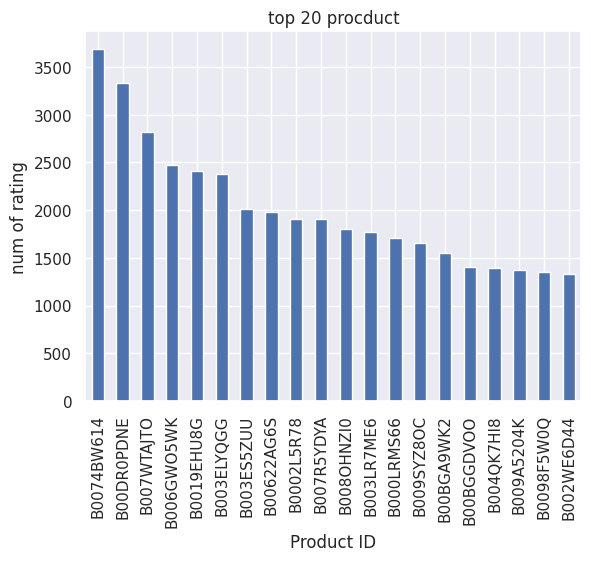

In [81]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

**Insight from above graph**

Product with high ratings counts may indicate popularity, making them good candidates for feature testing in the recommendation model.

In [82]:
#products with a high average rating may indicate high user satisfaction
product_mean_rating_with_count = pd.DataFrame(data.groupby('productId').agg(
    mean_rating=('rating', 'mean'),
    count=('rating', 'size')
).sort_values(by='mean_rating', ascending=False))

In [83]:
product_mean_rating_with_count.head(10)

,mean_rating,count
productId,,
B008VGCT9K,4.966102,59
B0029N3U8K,4.943262,141
B005KWHJES,4.933333,75
B00004XOM3,4.925926,54
B009WA115M,4.915966,119
B00125Y0NU,4.913043,115
B005LS2J14,4.909091,55
B0041OYTJE,4.906250,96
B0060B7NCG,4.901639,122


In [84]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean().sort_values(ascending=False))

In [85]:
mean_rating_product_count.head(10)

,rating
productId,
B008VGCT9K,4.966102
B0029N3U8K,4.943262
B005KWHJES,4.933333
B00004XOM3,4.925926
B009WA115M,4.915966
B00125Y0NU,4.913043
B005LS2J14,4.909091
B0041OYTJE,4.906250
B0060B7NCG,4.901639


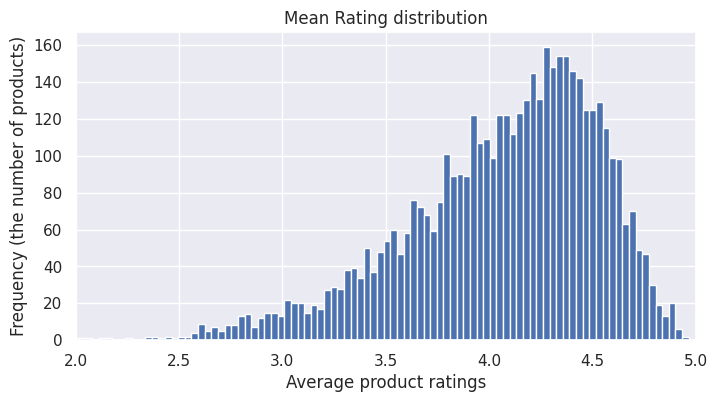

In [86]:
#plot the rating distribution of average rating product
plt.figure(figsize=(8,4))
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.xlabel('Average product ratings')
plt.ylabel('Frequency (the number of products)')
plt.xlim(2, 5)
plt.show()

**Key Observations from the graph**
* The majority of the product ratings are concentrated between 3.5 and 4.5, with a noticeable peak around 4.0. This suggests that most products are rated positively.
* There are fewer products with very low ratings (e.g., below 2.5) and very high ratings (near 5.0).
* The distribution appears to be slightly left-skewed, indicating that while most products tend to have above-average ratings, a small number of products with lower ratings pull the distribution slightly to the left

In [87]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.8990713315173332

**Key Observation from the skeweness**

* the skewness is negative, indicating that the distribution of the mean product ratings is slightly left-skewed.
* there is a tendency for a small number of products to have lower average ratings (e.g., closer to 2.0 or 3.0).

**Implications**

* the distribution is not symmetric but slightly skewed toward lower ratings.
* this could imply that while most products receive good ratings, there are a few products with significantly lower ratings that pull the mean rating distribution slightly to the left.

In [88]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [89]:
popular_high_rated = mean_rating_product_count[mean_rating_product_count['rating_counts'] >= 50]
popular_high_rated.head()

,rating,rating_counts
productId,,
B008VGCT9K,4.966102,59
B0029N3U8K,4.943262,141
B005KWHJES,4.933333,75
B00004XOM3,4.925926,54
B009WA115M,4.915966,119


In [90]:
mean_rating_product_count.head().sort_values(['rating_counts'], ascending=False)

,rating,rating_counts
productId,,
B0029N3U8K,4.943262,141
B009WA115M,4.915966,119
B005KWHJES,4.933333,75
B008VGCT9K,4.966102,59
B00004XOM3,4.925926,54


In [91]:
#find the product(s) with the highest number of ratings
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.485358,3688


In [92]:
#find the product(s) with the lowet number of ratings
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].head()

,rating,rating_counts
productId,,
B002XN3OL4,4.86,50
B000U9ZCS6,4.78,50
B00IDG3IDO,4.74,50
B002A6H72Q,4.72,50
B00005AXHW,4.68,50


In [93]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  99


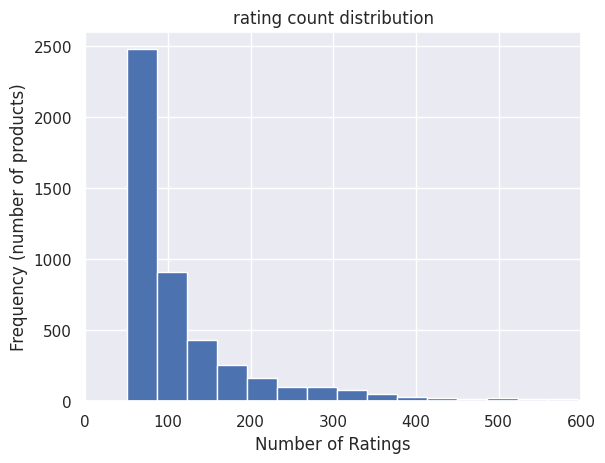

In [94]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100) #bins=100 argument specifies that the data will be divided into 100 intervals
plt.title('rating count distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency (number of products)') 
plt.xlim(0, 600) #adjusted this range based on where data is concentrated
plt.show()

**Key Observations**

* As the number of ratings increases, the frequency drops rapidly
* The graph is right skeweed which shows a sharp peak near the left side, indicating that most products have a low number of ratings
* There is a long tail extending to the right, meaning only a few products have a high number of ratings.

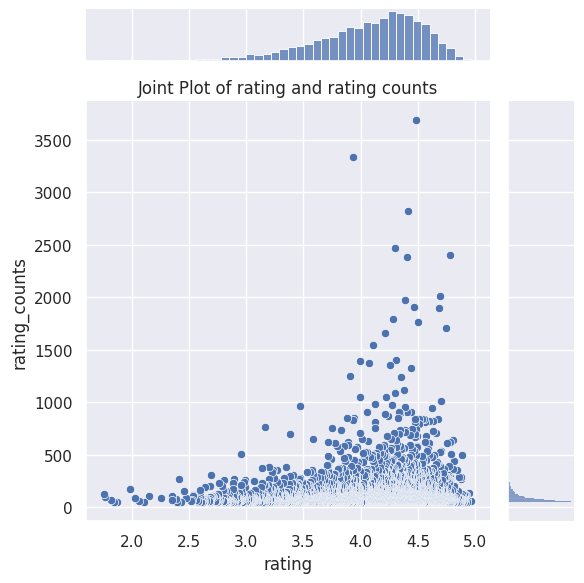

In [95]:
#visualize the relationship between the average rating (rating) and the number of ratings (rating_counts) for products
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

**Observations from the Joint Plot**

* The distribution of rating is right-skewed, meaning most products have ratings closer to 4.0 or higher.
* There is a positive correlation between rating and rating_counts for many products as with higher ratings (around 4.0–5.0) tend to receive more ratings
* Most points are clustered at lower rating_counts values (below 500), indicating that the majority of products have low numbers of ratings regardless of their average rating
* A few products have exceptionally high rating_counts (above 2000), and these tend to have ratings closer to 4.0 or higher. These outliers are likely popular or frequently purchased products.    
* Products with very low ratings (below 3.0) generally have low rating_counts, suggesting that poorly rated items are less reviewed.

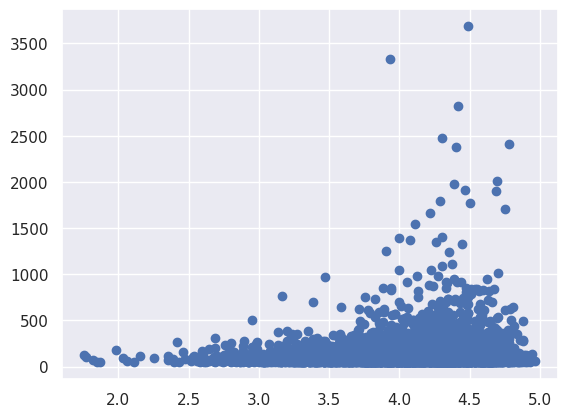

In [96]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [97]:
#check whether there is a relationship between the average product rating and the number of ratings a product has received.
correlation = mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])
print(f"Correlation between Rating and Rating Counts is: {correlation}")


Correlation between Rating and Rating Counts is: 0.10713480182299917


**Summary of the Result**

The correlation value 0.1142 tells us that:

* There is no strong linear dependency between the rating and the rating counts.
* While higher-rated products may have slightly more ratings, the relationship is minimal.

**Interpreting this result**

* For products with many ratings: A product that has received a lot of ratings doesn't guarantee a higher or lower average rating.
* For products with few ratings: A product with few ratings could have a very high or very low rating — there's no predictable trend.


**Collaborative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. CF predict a user's preferences for items (e.g., movies, products, or books) based on their past interactions and the preferences of other users. It relies on the idea that users who have similar behaviors or preferences in the past are likely to have similar preferences in the future. These techniques aim to fill in the missing entries of a user-item association matrix. 

We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [98]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans #A basic CF algorithm, taking into account the mean ratings of each user
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is already installed.


In [99]:
#load a pandas DataFrame into a surprise-compatible format
reader = Reader(rating_scale=(1, 5)) #defines the format of the input data and the range of the rating values.
surprise_data = Dataset.load_from_df(data,reader) #converts the pandas data into a format suitable for training and testing collaborative filtering models in Surprise.

In [100]:
#splitting surprise the dataset into 70,30 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [101]:
# initialize and train a KNN-based collaborative filtering model 
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [102]:
#evaluate the trained model using the test set
test_pred=algo.test(testset)

In [103]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3080


1.3079986073501144

RMSE of 1.3130 suggests that, on average, the model’s predictions are off by 1.3130 rating points from the actual ratings. While it’s not a poor result, there's room for improvement, it can be improved by tuning hyperparameters with different values for the k (number of neighbors) or similarity measure (pearson_baseline, cosine, etc.).

**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [104]:
#create a user-item ratings matrix from a sample of the dataset
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(
    values='rating', 
    index='userId', 
    columns='productId', 
    fill_value=0) #fills any missing ratings (i.e., cases where a user has not rated a product) with a default value of 0
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J061,B00000JDF5,B00000JI4F,B00000K135,B00000K2YR,B00001P4XA,...,B00I2VIR2M,B00I2ZBD1U,B00I9K3ZQ4,B00IDG3IDO,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A01862021NSU0BBVBENPH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A020057121BB5RIXSHWDG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02525812QIP6BVEJSDDG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A027050432XP5187VPRUH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A027941219C5AMOLDZLB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [105]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19905, 4384)

In [106]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A01862021NSU0BBVBENPH,A020057121BB5RIXSHWDG,A02525812QIP6BVEJSDDG,A027050432XP5187VPRUH,A027941219C5AMOLDZLB5,A0294936381JE306NK77P,A031039837WA119VJ191B,A0562036P6CKN4R5VZLT,A0655860XQH1M5Q8JH1M,A0689378635NHPQE042W,...,AZY2JVEUQXUIW,AZYY1UQQBJCXD,AZYYUCMIK4Y4Z,AZYZJ1ATWCE9K,AZZ8DZKIZ0NG3,AZZA4Q0JACD5U,AZZD6VSEQQE7O,AZZJSYRH4SSQY,AZZOQCD4U42P0,AZZSWXJW3YR2D
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
x_ratings_matrix.shape

(4384, 19905)

In [108]:
#Decomposition of the matrix using Singular Value Decomposition technique
#transforms the matrix into a lower-dimensional representation that captures the most important patterns in user-item interactions
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4384, 10)

In [109]:
#compute the correlation matrix of the latent features after applying SVD to the ratings matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4384, 4384)

In [110]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [111]:
# find the index of a specific product ID
i='B00000K2YR'
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

8


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [112]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4384,)

In [113]:
#filter the correlation matrix greater than 0.75
correlation_matrix[correlation_product_ID>0.75].shape

(114, 4384)

In [114]:
#Recommending top 20 highly correlated products in sequence
#filter the product IDs where the correlation with the target product's latent features is greater than 0.75.
#will return a list of product IDs that are highly correlated with the target product (i.e., they are similar in latent feature space)
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00000K2YR',
 'B000056SSM',
 'B000058AKE',
 'B00006JPDI',
 'B00007GQLU',
 'B00009V332',
 'B000204SWE',
 'B00022OBO2',
 'B000233WJ6',
 'B0002YE6FY',
 'B00065ANYC',
 'B0007N55NW',
 'B0007QN18U',
 'B000EEZCEG',
 'B000EMWBV0',
 'B000EPHP4U',
 'B000FV8P24',
 'B000I1ZWRC',
 'B000IJV4BC',
 'B000MF7L50']

In [115]:
# Save preprocessed matrices
ratings_matrix.to_csv('ratings_matrix.csv')
x_ratings_matrix.to_csv('x_ratings_matrix.csv')

In [116]:
# save the trained model to a file
import joblib

joblib.dump(SVD, 'svd_model.pkl')

['svd_model.pkl']